In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_sub2000 = df.loc[df["Year"] < 2000]
df_up2000 = df.loc[df["Year"] >= 2000]
df_sub2000 = df_sub2000.drop_duplicates(['Name'])
df_up2000 = df_up2000.drop_duplicates(['Name'])

# 1

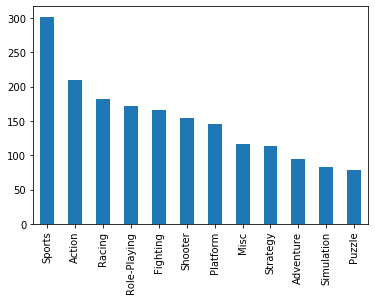

In [5]:
df_sub2000.Genre.value_counts().plot.bar()

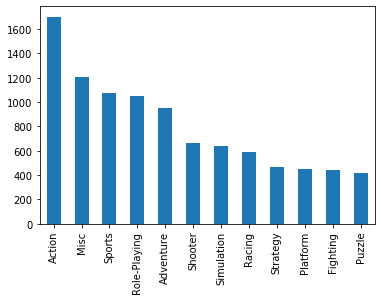

In [6]:
df_up2000.Genre.value_counts().plot.bar()

# 2

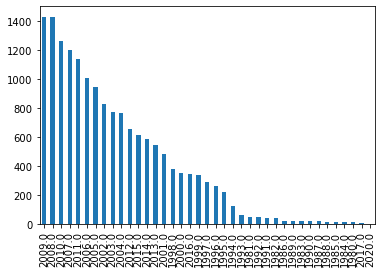

In [7]:
df.Year.value_counts().plot.bar()

# 3

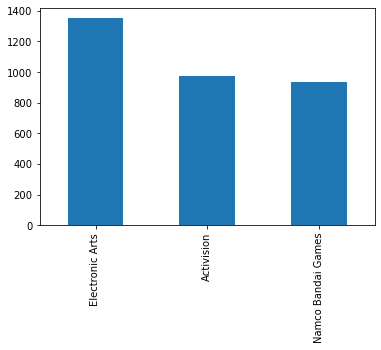

In [8]:
df_pubmany = df['Publisher'].value_counts().head(3)
df_pubmany.plot.bar()

# 4

In [9]:
df1 = df_sub2000['NA_Sales'].value_counts().sum()
df2 = df_sub2000['EU_Sales'].value_counts().sum()
df3 = df_sub2000['JP_Sales'].value_counts().sum()
df4 = df_sub2000['Global_Sales'].value_counts().sum()
df_hm = df1
df1

1818

df1 = df_sub2000['NA_Sales'].value_counts().sum()
df2 = df_sub2000['EU_Sales'].value_counts().sum()
df3 = df_sub2000['JP_Sales'].value_counts().sum()
df4 = df_sub2000['Global_Sales'].value_counts().sum()
df_hm = df1
df1

In [ ]:
df_sub2000.Genre.value_counts().plot.bar()

In [ ]:
df_up2000.Genre.value_counts().plot.bar()

# 2

In [ ]:
df.Year.value_counts().plot.bar()

# 3

In [ ]:
df_pubmany = df['Publisher'].value_counts().head(3)
df_pubmany.plot.bar()

# 4

In [ ]:
df1 = df_sub2000['NA_Sales'].value_counts()
df2 = df_sub2000['EU_Sales'].value_counts()
df3 = df_sub2000['JP_Sales'].value_counts()
df4 = df_sub2000['Global_Sales'].value_counts()
df1
# df_hm= df1 + df2 + df3
# df_hm.plot.pie(autopct='%.2f', figsize=(10, 10))

df1 = df_sub2000['NA_Sales'].value_counts()
df2 = df_sub2000['EU_Sales'].value_counts()
df3 = df_sub2000['JP_Sales'].value_counts()
df4 = df_sub2000['Global_Sales'].value_counts()
df1
# df_hm= df1 + df2 + df3
# df_hm.plot.pie(autopct='%.2f', figsize=(10, 10))

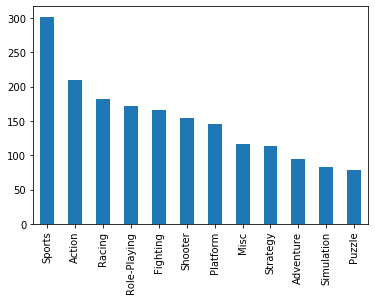

In [10]:
df_sub2000.Genre.value_counts().plot.bar()

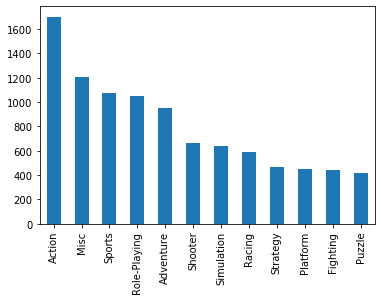

In [11]:
df_up2000.Genre.value_counts().plot.bar()

# 2

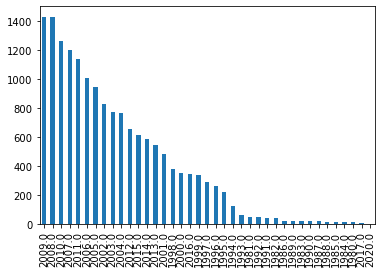

In [12]:
df.Year.value_counts().plot.bar()

# 3

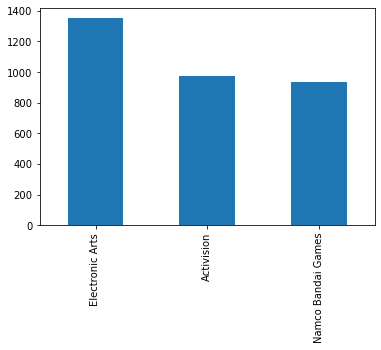

In [13]:
df_pubmany = df['Publisher'].value_counts().head(3)
df_pubmany.plot.bar()

# 4

In [34]:
df1 = df_sub2000['NA_Sales'].value_counts()
df2 = df_sub2000['EU_Sales'].value_counts()
df3 = df_sub2000['JP_Sales'].value_counts()
df4 = df_sub2000['Global_Sales'].value_counts()
df1
# df_hm= df1 + df2 + df3
# df_hm.plot.pie(autopct='%.2f', figsize=(10, 10))

0.00     635
0.04      54
0.02      53
0.06      49
0.03      49
        ... 
3.38       1
0.83       1
3.03       1
29.08      1
9.00       1
Name: NA_Sales, Length: 229, dtype: int64